In [16]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats.stats import kendalltau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LSTM, Masking
from tensorflow.keras.layers import MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import activations
sns.set()

In [17]:
#permutation feature importance values
gbc = pd.DataFrame([0.0307,0.0371,0.0566,0.0645,0.0664,0.1080,0.1488,0.1386,0.0282,0.0265,0.0680])
ada = pd.DataFrame([0.0032,0.0071,0.0059,0.0066,0.0467,0.0755,0.0380,0.0379,0.0503,0.0280,0.0392])
rfc = pd.DataFrame([0.0172,0.0547,0.0713,0.0493,0.0386,0.1409,0.0860,0.1770,0.0336,0.0350,0.0415])
nb = pd.DataFrame([0.0047,0.0083,-0.0284,-0.0253,0.0527,-0.0091,0.0170,0.0445,-0.0480,-0.0569,-0.0295])
nnmlp = pd.DataFrame([0.1232,0.1243,0.1451,0.1369,0.1180,0.2006,0.2486,0.2399,0.0653,0.1306,0.1545]) 
svc = pd.DataFrame([0.1278,0.1328,0.1584,0.1394,0.0727,0.1538,0.1740,0.1820,0.0753,0.1278,0.1149])
cnn = pd.DataFrame([0.0008,0.0038,0.0142,0.0070,0.0102,0.0496,0.0776,0.0570,0.0020,0.0330,-0.0012])
lstm = pd.DataFrame([0.0240,0.0046,-0.0028,0.0240,0.0190,0.0112,0.0468,0.1254,0.0878,0.0284,0.0172])

In [18]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *

train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
# test_sampled_all = glob.glob('./drive/MyDrive/compsci/test_sampled_all_centered_220.csv')
test_unsampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)

for j in test_unsampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

Loading  ./drive/MyDrive/compsci/train_sampled_all_220.csv
Loading  ./drive/MyDrive/compsci/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)


In [19]:
X_train = train_values[:,:-2]
X_test = test_values[:,:-2]
y_train = train_values[:,-2]
y_test = test_values[:,-2]
y_train_gc = (y_train - y_train.min())/(y_train.max()-y_train.min())*(9-1)
y_test_gc = (y_test - y_test.min())/(y_test.max()-y_test.min())*(9-1)
X_train1 = X_train.reshape(X_train.shape + (1,1))
X_test1 = X_test.reshape(X_test.shape + (1,1))
y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [20]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 256
activationFunction='relu'

def getlstmModel():
    
    lstmmodel = Sequential()
    lstmmodel.add(LSTM(128, return_sequences=True, input_shape=(X_train1.shape[1],1)))
    lstmmodel.add(LSTM(9, return_sequences=True))
    lstmmodel.add(MaxPooling1D(pool_size=2))
    lstmmodel.add(Flatten())
    lstmmodel.add(Dense(512, activation=tf.nn.relu))    
    lstmmodel.add(Dense(128, activation=tf.nn.relu))    
    lstmmodel.add(Dense(32, activation=tf.nn.relu))
    lstmmodel.add(Dense(9, activation='softmax'))
    lstmmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    lstmmodel.summary()
    return lstmmodel

lstmmodel = getlstmModel()

lstmmodelhistory= lstmmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 220, 128)          66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 220, 9)            4968      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 110, 9)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 990)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               507392    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


25529/25529 [==============================] - 46s 2ms/sample - loss: 0.6291 - accuracy: 0.8034 - val_loss: 0.2523 - val_accuracy: 0.9225
Epoch 2/5
25529/25529 [==============================] - 48s 2ms/sample - loss: 0.1829 - accuracy: 0.9427 - val_loss: 0.1652 - val_accuracy: 0.9494
Epoch 3/5
25529/25529 [==============================] - 46s 2ms/sample - loss: 0.1228 - accuracy: 0.9616 - val_loss: 0.1376 - val_accuracy: 0.9568
Epoch 4/5
25529/25529 [==============================] - 48s 2ms/sample - loss: 0.0946 - accuracy: 0.9701 - val_loss: 0.1031 - val_accuracy: 0.9695
Epoch 5/5
25529/25529 [==============================] - 47s 2ms/sample - loss: 0.0703 - accuracy: 0.9770 - val_loss: 0.1074 - val_accuracy: 0.9693


In [21]:
get_last_conv1 = keras.backend.function([lstmmodel.layers[0].input, keras.backend.learning_phase()], [lstmmodel.layers[1].output])
last_conv1_lstm = get_last_conv1([X_test1[:,:,:,0]])[0]

get_softmax1_lstm = keras.backend.function([lstmmodel.layers[0].input, keras.backend.learning_phase()], [lstmmodel.layers[-1].output])
softmax1_lstm = get_softmax1_lstm(([X_test1[:,:,:,0]]))[0]
softmax_weight1_lstm = lstmmodel.get_weights()[-1]
softmax_weight_lstm = np.reshape(softmax_weight1_lstm,(9,1))

In [22]:
from itertools import islice
def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return
a = last_conv1_lstm
new_last_lstm = []
for i in range(len(last_conv1_lstm)):
  means = list(means_of_slices(a[i], 20))
  new_last_lstm.append(means)
new_last_lstm = np.array(new_last_lstm)
print(new_last_lstm.shape)

final_last_lstm = []
for i in new_last_lstm:
  final_last_lstm.append(np.repeat(i,20))
final_last_lstm = np.array(final_last_lstm)
print(final_last_lstm.shape)

(37863, 11)
(37863, 220)


In [23]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 64
activationFunction='relu'

def getModel():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=16,padding='same', activation='relu',input_shape=(X_train1.shape[1],1)))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=32, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=9, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2,padding='same'))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(512, activation='relu'))
    cnnmodel.add(Dense(128, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(9, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()
modelhistory= cnnmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 220, 128)          2176      
_________________________________________________________________
batch_normalization_2 (Batch (None, 220, 128)          512       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 220, 32)           65568     
_________________________________________________________________
batch_normalization_3 (Batch (None, 220, 32)           128       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 220, 9)            4617      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 110, 9)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 990)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


25529/25529 [==============================] - 4s 164us/sample - loss: 0.3103 - accuracy: 0.9000 - val_loss: 0.3347 - val_accuracy: 0.8872
Epoch 2/5
25529/25529 [==============================] - 4s 152us/sample - loss: 0.1253 - accuracy: 0.9585 - val_loss: 0.1133 - val_accuracy: 0.9619
Epoch 3/5
25529/25529 [==============================] - 4s 151us/sample - loss: 0.0832 - accuracy: 0.9718 - val_loss: 0.1084 - val_accuracy: 0.9657
Epoch 4/5
25529/25529 [==============================] - 4s 144us/sample - loss: 0.0639 - accuracy: 0.9775 - val_loss: 0.0883 - val_accuracy: 0.9743
Epoch 5/5
25529/25529 [==============================] - 4s 148us/sample - loss: 0.0504 - accuracy: 0.9825 - val_loss: 0.1041 - val_accuracy: 0.9698


In [24]:
get_last_conv1 = keras.backend.function([cnnmodel.layers[0].input, keras.backend.learning_phase()], [cnnmodel.layers[4].output])
last_conv1_cnn = get_last_conv1([X_test1[:,:,:,0]])[0]

get_softmax1_cnn = keras.backend.function([cnnmodel.layers[0].input, keras.backend.learning_phase()], [cnnmodel.layers[-1].output])
softmax1_cnn = get_softmax1_cnn(([X_test1[:,:,:,0]]))[0]
softmax_weight1_cnn = cnnmodel.get_weights()[-1]
softmax_weight_cnn = np.reshape(softmax_weight1_cnn,(9,1))

In [25]:
from itertools import islice
def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return
a = last_conv1_cnn
new_last_conv1 = []

for i in range(len(last_conv1_cnn)):
  means = list(means_of_slices(a[i], 20))
  new_last_conv1.append(means)
new_last_conv1 = np.array(new_last_conv1)
print(new_last_conv1.shape)

final_last_conv1 = []
for i in new_last_conv1:
  final_last_conv1.append(np.repeat(i,20))
final_last_conv1 = np.array(final_last_conv1)
print(final_last_conv1.shape)

(37863, 11)
(37863, 220)


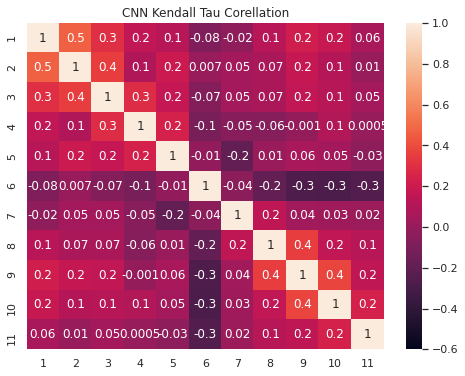

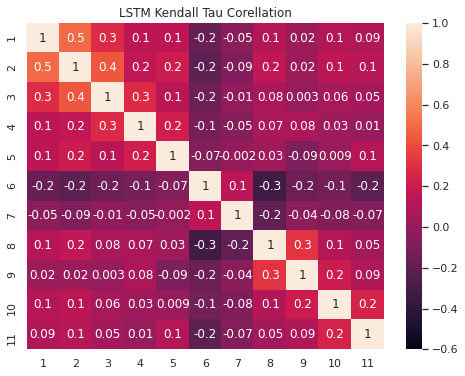

In [26]:
df_cnn = pd.DataFrame(new_last_conv1)
corr_cnn = df_cnn.corr(method='kendall')
slices_nums = [1,2,3,4,5,6,7,8,9,10,11]
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr_cnn,annot=True,xticklabels=slices_nums,yticklabels=slices_nums,vmin=-0.6,vmax=1,fmt='0.1g')
plt.title('CNN Kendall Tau Corellation')
plt.show()

df_lstm = pd.DataFrame(new_last_lstm)
corr_lstm = df_lstm.corr(method='kendall')
slices_nums = [1,2,3,4,5,6,7,8,9,10,11]
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr_lstm,annot=True,xticklabels=slices_nums,yticklabels=slices_nums,vmin=-0.6,vmax=1,fmt='0.1g')
plt.title('LSTM Kendall Tau Corellation')
plt.show()

0     0.296093
1     0.205811
2     0.206896
3     0.141628
4     0.193622
5     0.261604
6    -0.415843
7     0.110567
8     0.141962
9     0.198022
10    0.221894
dtype: float64


Text(0.5, 1.0, 'Kendall Tau Correlation Between CNN and LSTM Segments')

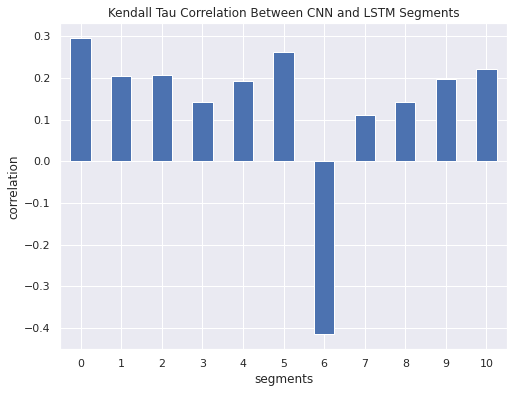

In [27]:
# df_cnn_std = (df_cnn-df_cnn.mean())/df_cnn.std()
# df_lstm_std = (df_lstm-df_lstm.mean())/df_lstm.std()
rcParams['figure.figsize'] = 8,6
corrwith = df_cnn.corrwith(df_lstm, method='kendall')
print(corrwith)
corrwith.plot(kind='bar',rot=0)
plt.xlabel('segments')
plt.ylabel('correlation')
plt.title('Kendall Tau Correlation Between CNN and LSTM Segments')

In [28]:
models = (gbc,ada,rfc,nb,nnmlp,svc,cnn,lstm)
models = pd.concat(models,axis=1)
models.columns = ['gbc','ada','rfc','nb','nnmlp','svc','cnn','lstm']
models

# models = (lstm,ada,nb,cnn,gbc,svc,rfc,nnmlp)
# models = pd.concat(models,axis=1)
# models.columns = ['lstm','ada','nb','cnn','gbc','svc','rfc','nnmlp']
# models

,gbc,ada,rfc,nb,nnmlp,svc,cnn,lstm
0,0.0307,0.0032,0.0172,0.0047,0.1232,0.1278,0.0008,0.0240
1,0.0371,0.0071,0.0547,0.0083,0.1243,0.1328,0.0038,0.0046
2,0.0566,0.0059,0.0713,-0.0284,0.1451,0.1584,0.0142,-0.0028
3,0.0645,0.0066,0.0493,-0.0253,0.1369,0.1394,0.0070,0.0240
4,0.0664,0.0467,0.0386,0.0527,0.1180,0.0727,0.0102,0.0190
5,0.1080,0.0755,0.1409,-0.0091,0.2006,0.1538,0.0496,0.0112
6,0.1488,0.0380,0.0860,0.0170,0.2486,0.1740,0.0776,0.0468
7,0.1386,0.0379,0.1770,0.0445,0.2399,0.1820,0.0570,0.1254
8,0.0282,0.0503,0.0336,-0.0480,0.0653,0.0753,0.0020,0.0878
9,0.0265,0.0280,0.0350,-0.0569,0.1306,0.1278,0.0330,0.0284


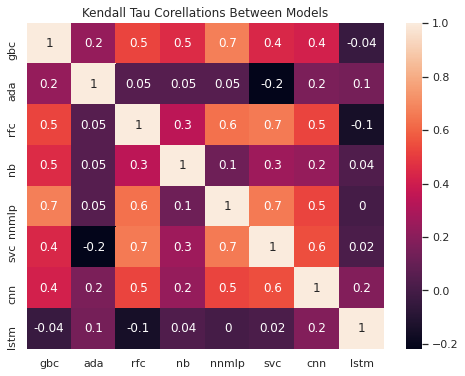

In [29]:
corr = models.corr(method='kendall')
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr,annot=True,fmt='0.1g')
plt.xlabel('models')
plt.title('Kendall Tau Corellations Between Models')
plt.show()